In [1]:
import os
import pandas as pd
from geopy.distance import geodesic


def eval_model(test_path):
    gt = pd.read_csv(os.path.join(test_path, "Location.csv"))
    pred = pd.read_csv(os.path.join(test_path, "Location_output.csv"))
    dist_error = get_dist_error(gt, pred)
    dir_error = get_dir_error(gt, pred)
    print("Distances error: ", dist_error)
    print("Direction error: ", dir_error)


def get_dir_error(gt, pred):
    dir_list = []
    for i in range(int(len(gt) * 0.1), len(gt)):
        dir = abs(gt[gt.columns[5]][i] - pred[pred.columns[5]][i])
        dir_list.append(dir)
    error = sum(dir_list) / len(dir_list)
    return error


def get_dist_error(gt, pred):
    print("local_error")
    dist_list = []
    for i in range(int(len(gt) * 0.1), len(gt)):
        dist = geodesic((gt[gt.columns[1]][i], gt[gt.columns[2]][i]), (pred[pred.columns[1]][i], pred[pred.columns[2]][i])).meters
        dist_list.append(dist)
    error = sum(dist_list) / len(dist_list)
    return error


In [2]:
eval_model("test_case0")

local_error
Distances error:  783.5751296395072
Direction error:  5.144421343451347


n = 601


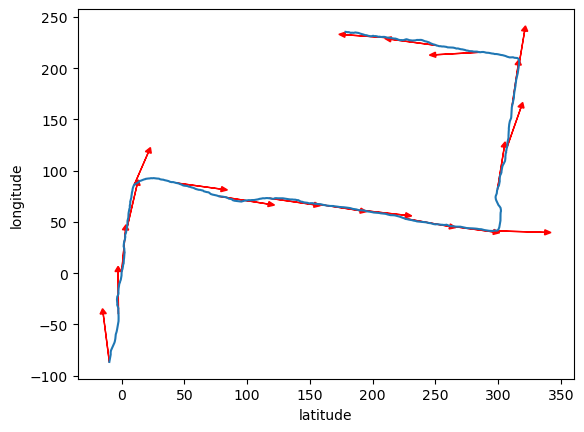

In [3]:
from matplotlib import pyplot as plt
import numpy as np

test_path = "test_case0"
# test_path = "../Dataset-of-Pedestrian-Dead-Reckoning/Hand-Walk/Hand-Walk-09-001"
gt = pd.read_csv(os.path.join(test_path, "Location.csv"))
n = len(gt)
K = 1e5
print(f"{n = }")
origin_index = int(len(gt) * 0.1) - 1
origin = (gt[gt.columns[1]][origin_index], gt[gt.columns[2]][origin_index])
# 画出经纬度轨迹
x = [K * (gt[gt.columns[1]][i] - origin[0]) for i in range(n)]
y = [K * (gt[gt.columns[2]][i] - origin[1]) for i in range(n)]
plt.plot(x, y, label="ground truth")

# 每隔 n / number_of_arrows 个点画一个方向箭头
number_of_arrows = 20
period = n // number_of_arrows
for i in range(0, n - period, period):
    length = ((x[i + period] - x[i]) ** 2 + (y[i + period] - y[i]) ** 2) ** 0.5
    direction = gt[gt.columns[5]][i]
    # deg2rag
    angle = direction * np.pi / 180
    dx, dy = length * np.cos(angle), length * np.sin(angle)
    plt.arrow(x[i], y[i], dx, dy, head_width=5, head_length=5, fc='r', ec='r')

# plt.plot(pred_x, pred_y, '.', label="prediction")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [4]:
gt = pd.read_csv(os.path.join(test_path, "Location.csv"))
# pred = pd.read_csv(os.path.join(test_path, "Location_output.csv"))
accelerometer = pd.read_csv(os.path.join(test_path, "Accelerometer.csv"))
# barometer = pd.read_csv(os.path.join(test_path, "Barometer.csv"))
gyroscope = pd.read_csv(os.path.join(test_path, "Gyroscope.csv"))
linear_accelererometer = pd.read_csv(os.path.join(test_path, "Linear Accelerometer.csv"))
magnetometer = pd.read_csv(os.path.join(test_path, "Magnetometer.csv"))

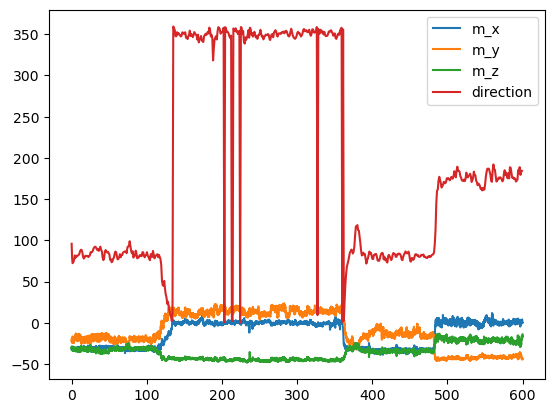

In [5]:
# # 画出陀螺仪的三个轴
# plt.plot(gyroscope[gyroscope.columns[0]], gyroscope[gyroscope.columns[1]] * 100, label="g_x")
# plt.plot(gyroscope[gyroscope.columns[0]], gyroscope[gyroscope.columns[2]] * 100, label="g_y")
# plt.plot(gyroscope[gyroscope.columns[0]], gyroscope[gyroscope.columns[3]] * 100, label="g_z")
# 画出磁力计的三个轴
plt.plot(magnetometer[magnetometer.columns[0]], magnetometer[magnetometer.columns[1]], label="m_x")
plt.plot(magnetometer[magnetometer.columns[0]], magnetometer[magnetometer.columns[2]], label="m_y")
plt.plot(magnetometer[magnetometer.columns[0]], magnetometer[magnetometer.columns[3]], label="m_z")
# 再画出方向, 即 gt 的第 5 列
plt.plot(gt[gt.columns[0]], gt[gt.columns[5]], label="direction")
plt.legend()
plt.show()

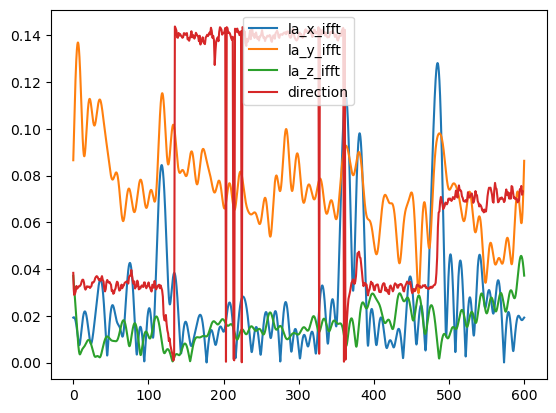

In [13]:
# 长度
begin = 0 * 50
end = 600 * 50
# 时间轴
t = accelerometer[accelerometer.columns[0]][begin:end]
t_prime = gt[gt.columns[0]][begin // 50:end // 50]
# 方向
direction = gt[gt.columns[5]][begin // 50:end // 50]
# 加速度
a_x = accelerometer[accelerometer.columns[1]][begin:end]
a_y = accelerometer[accelerometer.columns[2]][begin:end]
a_z = accelerometer[accelerometer.columns[3]][begin:end]
# 线性加速度
la_x = linear_accelererometer[linear_accelererometer.columns[1]][begin:end]
la_y = linear_accelererometer[linear_accelererometer.columns[2]][begin:end]
la_z = linear_accelererometer[linear_accelererometer.columns[3]][begin:end]
# 陀螺仪
g_x = gyroscope[gyroscope.columns[1]][begin:end]
g_y = gyroscope[gyroscope.columns[2]][begin:end]
g_z = gyroscope[gyroscope.columns[3]][begin:end]
# 磁力计
m_x = magnetometer[magnetometer.columns[1]][begin:end]
m_y = magnetometer[magnetometer.columns[2]][begin:end]
m_z = magnetometer[magnetometer.columns[3]][begin:end]
# 气压计
# b = barometer[barometer.columns[1]][begin:end]
# 加速度的模
la_mag = (la_x ** 2 + la_y ** 2 + la_z ** 2) ** 0.5
# 进行傅里叶变换
la_x_fft = np.fft.fft(la_x)
la_y_fft = np.fft.fft(la_y)
la_z_fft = np.fft.fft(la_z)
la_mag_fft = np.fft.fft(la_mag)
# 过滤高频信息
size = 50
la_mag_fft[size:] = 0.
la_x_fft[size:] = 0.
la_y_fft[size:] = 0.
la_z_fft[size:] = 0.
# 画出加速度的傅里叶变换
# plt.plot(t, np.abs(la_mag_fft), label="la_mag_fft")
# plt.plot(t, np.abs(la_x_fft), label="la_x_fft")
# plt.plot(t, np.abs(la_y_fft), label="la_y_fft")
# plt.plot(t, np.abs(la_z_fft), label="la_z_fft")
# 逆傅里叶变换
la_mag_ifft = np.fft.ifft(la_mag_fft)
la_x_ifft = np.fft.ifft(la_x_fft)
la_y_ifft = np.fft.ifft(la_y_fft)
la_z_ifft = np.fft.ifft(la_z_fft)
# 画出加速度的逆傅里叶变换
# plt.plot(t, np.abs(la_mag_ifft), label="la_mag_ifft")
# plt.plot(t, np.abs(la_x), label="la_x")
plt.plot(t, np.abs(la_x_ifft), label="la_x_ifft")
plt.plot(t, np.abs(la_y_ifft), label="la_y_ifft")
plt.plot(t, np.abs(la_z_ifft), label="la_z_ifft")
# 画出方向
plt.plot(t_prime, direction * 4e-4, label="direction")
plt.legend()
plt.show()

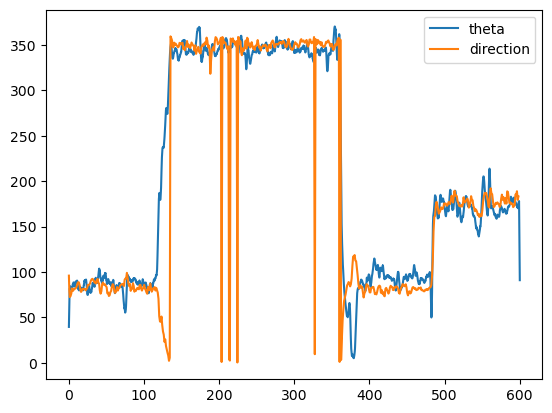

In [15]:
# 对加速度和线性加速度进行平滑处理
filter = np.ones(5) / 5
la_x_filtered = np.convolve(la_x, filter, mode="same")
la_y_filtered = np.convolve(la_y, filter, mode="same")
la_z_filtered = np.convolve(la_z, filter, mode="same")
la_mag_filtered = (la_x_filtered ** 2 + la_y_filtered ** 2 + la_z_filtered ** 2) ** 0.5
a_x_filtered = np.convolve(a_x, filter, mode="same")
a_y_filtered = np.convolve(a_y, filter, mode="same")
a_z_filtered = np.convolve(a_z, filter, mode="same")
a_mag_filtered = (a_x_filtered ** 2 + a_y_filtered ** 2 + a_z_filtered ** 2) ** 0.5
# 求出重力加速度
g_x_filtered = a_x_filtered - la_x_filtered
g_y_filtered = a_y_filtered - la_y_filtered
g_z_filtered = a_z_filtered - la_z_filtered
g_mag_filtered = (g_x_filtered ** 2 + g_y_filtered ** 2 + g_z_filtered ** 2) ** 0.5
# 对 a_x_filtered, a_y_filtered, a_z_filtered 进行 PCA 降维
a = np.array([a_x_filtered, a_y_filtered, a_z_filtered])
a = a.T
# 求 a 的协方差矩阵
a_cov = np.cov(a.T)
# 求 a 的特征值和特征向量
a_eig_val, a_eig_vec = np.linalg.eig(a_cov)
# 按照特征值从大到小排序
a_eig_val = np.sort(a_eig_val)[::-1]
a_eig_vec = a_eig_vec[:, np.argsort(a_eig_val)[::-1]]
# 右向量是最小特征值对应的特征向量
a_right_vec = a_eig_vec[:, -1]
# 将右向量投影到 g 上
a_gravity = np.array([g_x_filtered, g_y_filtered, g_z_filtered])
a_gravity = a_gravity.T
# 将右向量投影到 g 上
a_right_vertical = np.array([(np.dot(a_right_vec, a_g) / np.dot(a_g, a_g)) * a_g for a_g in a_gravity])
# 求出水平右向量
a_right_horizontal =  a_right_vec - a_right_vertical
# 通过磁向量求出北向量
m_north = np.array([m_x, m_y, m_z])
m_north = m_north.T
# 通过与重力向量的叉乘求出东向量
m_east = np.cross(a_gravity, m_north)
# 角度 theta = arccos((R_h * E) / (|R_h| * |E|))
theta = np.array([np.arccos(np.dot(R_h, E) / (np.linalg.norm(R_h) * np.linalg.norm(E))) * (3 * 180 / np.pi) for R_h, E in zip(a_right_horizontal, m_east)])
# 对 theta 进行平滑处理
theta_filter = np.ones(100) / 100
theta_filtered = np.convolve(theta, theta_filter, mode="same")
# 画出 theta
plt.plot(t, theta_filtered, label="theta")
plt.plot(t_prime, direction, label="direction")
plt.legend()
plt.show()